In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
AMINO_ACIDS = np.array([aa for aa in "RKDEQNHSTCYWAILMFVPG"], "S1")
AA_LEN = AMINO_ACIDS.size
AMINO_ACIDS_STR = AMINO_ACIDS.tostring().decode('UTF-8')

In [3]:
dist_zero = np.zeros((AA_LEN, AA_LEN), dtype=np.float)
dist_zero[5, 10] = 1.0

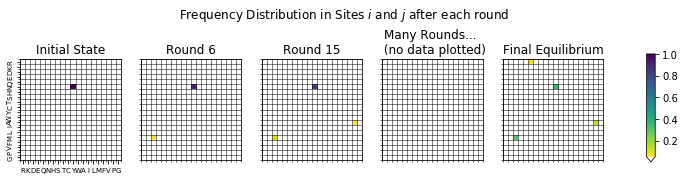

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 3))

cmap = plt.cm.viridis_r
cmap.set_under('w')
default_cmap = cmap
vmin = 0.05
vmax = 1.0

for i, ax in enumerate(axs):
    if i == 0:
        ax.set_xticks(np.arange(0, AA_LEN, 1));
        ax.set_yticks(np.arange(0, AA_LEN, 1));
        ax.set_xticklabels(AMINO_ACIDS_STR);
        ax.set_yticklabels(AMINO_ACIDS_STR);
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, fontsize="x-small")
        plt.setp(ax.yaxis.get_majorticklabels(), rotation=90, fontsize="x-small")
    else:
        ax.set_xticks([])
        ax.set_yticks([])

    # Minor ticks
    ax.set_xticks(np.arange(-.5, AA_LEN, 1), minor=True);
    ax.set_yticks(np.arange(-.5, AA_LEN, 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1, alpha=0.5)

im = axs[0].imshow(dist_zero, cmap=default_cmap, vmin=vmin, vmax=vmax)
axs[0].set_title("Initial State")

dist2 = dist_zero.copy()
dist2[5, 10] = 0.90
dist2[15, 2] = 0.06
dist2[12, 18] = 0.03
dist2[0, 5] = 0.01
axs[1].imshow(dist2, cmap=default_cmap, vmin=vmin, vmax=vmax)
axs[1].set_title("Round 6")

dist3 = dist_zero.copy()
dist3[5, 10] = 0.80
dist3[15, 2] = 0.11
dist3[12, 18] = 0.06
dist3[0, 5] = 0.02
dist3[6,7] = 0.01
axs[2].imshow(dist3, cmap=default_cmap, vmin=vmin, vmax=vmax)
axs[2].set_title("Round 15")

axs[3].set_title("Many Rounds... \n (no data plotted)")
axs[3].imshow(np.zeros_like(dist_zero), cmap=default_cmap, vmin=vmin, vmax=vmax)

dist4 = dist_zero.copy()
dist4[5, 10] = 0.35
dist4[15, 2] = 0.30
dist4[12, 18] = 0.15
dist4[0, 5] = 0.07
dist4[6,7] = 0.04
dist4[15, 12] = 0.04
axs[4].imshow(dist4, cmap=default_cmap, vmin=vmin, vmax=vmax)
axs[4].set_title("Final Equilibrium")

# now put a color bar on the right
fig = plt.gcf()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.26, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax, extend="min")

fig.suptitle("Frequency Distribution in Sites $i$ and $j$ after each round")

plt.savefig("assets/Neutral Evolution Distribution.png", transparent=False, dpi=600)
